In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('notebook')
sns.set_style('darkgrid')
from matplotlib import style
style.use('dark_background')

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [17]:
type(cancer)

sklearn.utils.Bunch

In [15]:
cancer['data'].shape

(569, 30)

In [16]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [18]:
X = pd.DataFrame(data=cancer['data'], columns=cancer['feature_names'])

In [19]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [25]:
y = pd.DataFrame(data=cancer['target'], columns=['malignant'])

In [28]:
y.sample(5)

,malignant
50,1
270,1
45,0
543,1
459,1


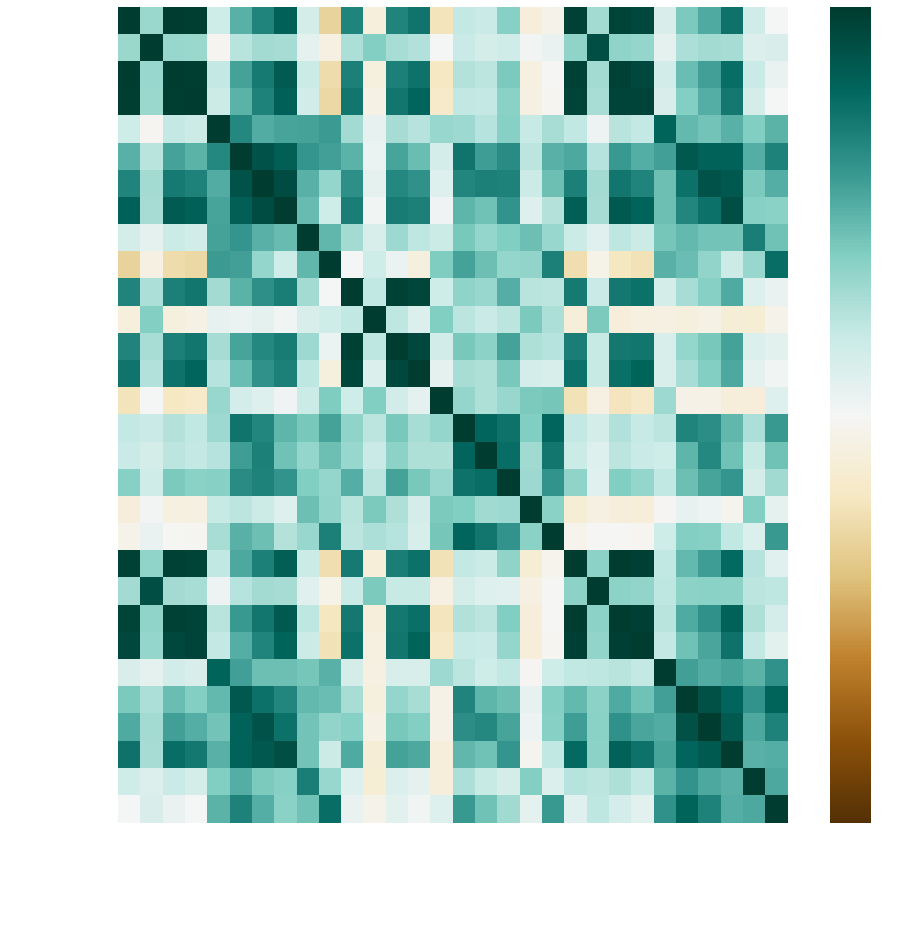

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(), annot=False, cmap='BrBG', vmin=-1, vmax=1)

In [36]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [53]:
from sklearn.svm import SVC

In [54]:
clf = SVC()

In [55]:
clf.fit(X_train, np.ravel(y_train))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
from sklearn.metrics import classification_report

In [57]:
test_predictions = clf.predict(X_test)

In [58]:
print(classification_report(y_test, test_predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        54
          1       0.62      1.00      0.77        89

avg / total       0.39      0.62      0.48       143



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [59]:
from sklearn.model_selection import GridSearchCV

In [67]:
params = {'C':[0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma':[1, 0.1, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]}

In [68]:
svm_gs = GridSearchCV(estimator=SVC(), param_grid=params, 
                      cv=5, verbose=2,
                      scoring='f1')

In [69]:
svm_gs.fit(X_train, np.ravel(y_train))

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    7.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [1, 0.1, 0.001, 0.0001, 1e-05, 1e-06, 1e-07]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=2)

In [70]:
gs_predictions = svm_gs.predict(X_test)

In [72]:
print(classification_report(y_test, gs_predictions))

             precision    recall  f1-score   support

          0       0.98      0.93      0.95        54
          1       0.96      0.99      0.97        89

avg / total       0.97      0.97      0.96       143



In [73]:
svm_gs.best_params_

{'C': 100000, 'gamma': 1e-07}

In [74]:
lin_svm = SVC(kernel='linear')

In [78]:
linsvm_gs = GridSearchCV(lin_svm, param_grid={'C':[0.1,1,10,100,1000,10000]},
                        cv=5, scoring='f1', verbose=3)

In [79]:
linsvm_gs.fit(X_train, y_train['malignant'])

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.9629629629629629, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.9454545454545454, total=   0.0s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] .................. C=0.1, score=0.9906542056074767, total=   0.1s
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.9464285714285715, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.9345794392523364, total=   0.0s
[CV] C=1 .............................................................
[CV] .................... C=1, score=0.9719626168224299, total=   1.8s
[CV] C=1 .............................................................
[CV] .................... C=1, score=0.9464285714285714, total=   2.0s
[CV] C=1 .............................................................
[CV] .................... C=1, score=0.9814814814814815, total=   1.6s
[CV] C=1 .............................................................
[CV] .................... C=1, score=0.9724770642201834, total=   2.5s
[CV] C=1 .............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=3)

In [81]:
lin_predictions = linsvm_gs.predict(X_test)

In [82]:
print(classification_report(y_test, lin_predictions))

             precision    recall  f1-score   support

          0       0.95      0.96      0.95        54
          1       0.98      0.97      0.97        89

avg / total       0.97      0.97      0.97       143



In [83]:
linsvm_gs.best_params_

{'C': 10}

In [84]:
from sklearn.linear_model import LogisticRegression

In [86]:
lr_gs = GridSearchCV(LogisticRegression(), 
                     param_grid={'C':[0.1,1,10,100,1000,10000]},
                     cv=5, scoring='f1', verbose=3)

In [88]:
lr_gs.fit(X_train, y_train['malignant'])

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.9724770642201834, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.9272727272727271, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.9541284403669724, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.9380530973451328, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.9333333333333333, total=   0.0s
[CV] C=1 .............................................................
[CV] .................... C=1, score=0.9814814814814815, total=   0.0s
[CV] C=1 .............................................................
[CV] ............

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=10 ............................................................
[CV] ................... C=10, score=0.9333333333333333, total=   0.0s
[CV] C=100 ...........................................................
[CV] .................. C=100, score=0.9719626168224299, total=   0.0s
[CV] C=100 ...........................................................
[CV] ................... C=100, score=0.972972972972973, total=   0.0s
[CV] C=100 ...........................................................
[CV] .................. C=100, score=0.9906542056074767, total=   0.0s
[CV] C=100 ...........................................................
[CV] .................. C=100, score=0.9724770642201834, total=   0.0s
[CV] C=100 ...........................................................
[CV] .................. C=100, score=0.9433962264150944, total=   0.0s
[CV] C=1000 ..........................................................
[CV] ................. C=1000, score=0.9719626168224299, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=3)

In [89]:
lr_predictions = lr_gs.predict(X_test)

In [90]:
print(classification_report(y_test, lr_predictions))

             precision    recall  f1-score   support

          0       0.94      0.94      0.94        54
          1       0.97      0.97      0.97        89

avg / total       0.96      0.96      0.96       143



In [91]:
lr_gs.best_params_

{'C': 1000}